<a href="https://colab.research.google.com/github/arewelearningyet/neuralnetworks/blob/master/module3-Intro-to-Keras/LS_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [2]:
'''IMPORT boston_housing from KERAS lib '''

from tensorflow.keras.datasets import boston_housing

(xtrain, ytrain), (xtest, ytest) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
''' NORMALIZE the data [all feats roughly same scale] '''

import sklearn.preprocessing

normalizer = sklearn.preprocessing.Normalizer()
normalizer.fit(xtrain)

xtrain = normalizer.transform(xtrain)
xtest = normalizer.transform(xtest)

In [4]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((404, 13), (404,), (102, 13), (102,))

In [0]:
''' IMPORT the type of MODEL and LAYERS that you will need from KERAS '''

import tensorflow as tf

In [6]:
''' INSTANTIATE a MODEL OBJECT and use model.add() to add layers to your model '''

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(13,)))
model.add(tf.keras.layers.Dense(32, activation='selu'))
model.add(tf.keras.layers.Dense(32, activation='selu'))
model.add(tf.keras.layers.Dense(32, activation='selu'))
model.add(tf.keras.layers.Dense(32, activation='selu'))
model.add(tf.keras.layers.Dense(64, activation='selu'))

''' since this is a regrsn model, has a single output node in the final layer '''

tf.keras.layers.Dense(1, activation='selu') 

''' use activation functions that are appropriate for this task '''

' use activation functions that are appropriate for this task '

In [0]:
''' compile your model '''
model.compile(loss='mse', optimizer='nadam', metrics=['mse'])

In [8]:
''' fit your model and report it's accuracy in terms of mean squared error '''

model.fit(xtrain, ytrain, epochs=200, validation_data=(xtest, ytest))

Epoch 1/200
13/13 [==============================] - 0s 17ms/step - loss: 577.8455 - mse: 581.5352 - val_loss: 679.9955 - val_mse: 596.7523
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 544.7448 - mse: 545.1611 - val_loss: 611.2643 - val_mse: 532.6915
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 449.2828 - mse: 447.4741 - val_loss: 440.2330 - val_mse: 375.1362
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 258.7245 - mse: 263.0925 - val_loss: 209.8606 - val_mse: 172.0582
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 127.7732 - mse: 125.5243 - val_loss: 119.5266 - val_mse: 102.7316
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 94.2865 - mse: 93.5150 - val_loss: 100.6952 - val_mse: 84.7427
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 83.3908 - mse: 81.8064 - val_loss: 92.4036 - val_mse: 78.0416
Epoch 8/200
13/13 [==============

Text(0, 0.5, 'mean squared error')

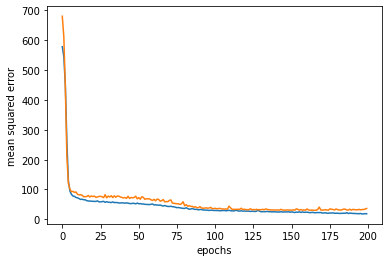

In [9]:
''' visualizing... '''

import matplotlib.pyplot as plt

log = model.history.history

plt.plot(log['loss'], label='train loss')
plt.plot(log['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('mean squared error')

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [10]:
''' Load and preprocess the image data similar to how we preprocessed the MNIST data in class. '''

(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
''' Make sure to one-hot encode your category labels '''

ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [12]:
''' The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST. '''

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(784, activation='selu'),
                                    tf.keras.layers.Dense(784, activation='selu'),
                                    tf.keras.layers.Dense(784, activation='selu'),
                                    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(x=xtrain, y=ytrain, epochs=32, validation_data=(xtest, ytest))

Epoch 1/32
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6292 - accuracy: 0.7904 - val_loss: 0.4583 - val_accuracy: 0.8354
Epoch 2/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4541 - accuracy: 0.8395 - val_loss: 0.4184 - val_accuracy: 0.8547
Epoch 3/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4347 - accuracy: 0.8466 - val_loss: 0.4548 - val_accuracy: 0.8459
Epoch 4/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4223 - accuracy: 0.8511 - val_loss: 0.4473 - val_accuracy: 0.8488
Epoch 5/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4182 - accuracy: 0.8558 - val_loss: 0.4269 - val_accuracy: 0.8483
Epoch 6/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3971 - accuracy: 0.8640 - val_loss: 0.4236 - val_accuracy: 0.8552
Epoch 7/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3777 - accuracy: 0.8694 - val_loss: 0.5240 - val_accuracy:

In [15]:
''' The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST. '''

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(x=xtrain, y=ytrain, epochs=32, validation_data=(xtest, ytest))

Epoch 1/32
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5036 - accuracy: 0.7889 - val_loss: 0.4859 - val_accuracy: 0.8245
Epoch 2/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4364 - accuracy: 0.8443 - val_loss: 0.4853 - val_accuracy: 0.8314
Epoch 3/32
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3998 - accuracy: 0.8562 - val_loss: 0.4113 - val_accuracy: 0.8515
Epoch 4/32
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3835 - accuracy: 0.8625 - val_loss: 0.3971 - val_accuracy: 0.8598
Epoch 5/32
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3725 - accuracy: 0.8680 - val_loss: 0.4221 - val_accuracy: 0.8572
Epoch 6/32
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3566 - accuracy: 0.8723 - val_loss: 0.3936 - val_accuracy: 0.8647
Epoch 7/32
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3477 - accuracy: 0.8771 - val_loss: 0.4097 - val_accuracy:

In [17]:
''' The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST. '''

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(x=xtrain, y=ytrain, epochs=32, validation_data=(xtest, ytest))

Epoch 1/32
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1160 - accuracy: 0.7926 - val_loss: 0.5047 - val_accuracy: 0.8134
Epoch 2/32
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4303 - accuracy: 0.8467 - val_loss: 0.4279 - val_accuracy: 0.8457
Epoch 3/32
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3967 - accuracy: 0.8597 - val_loss: 0.4015 - val_accuracy: 0.8570
Epoch 4/32
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3783 - accuracy: 0.8675 - val_loss: 0.4345 - val_accuracy: 0.8553
Epoch 5/32
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3672 - accuracy: 0.8710 - val_loss: 0.3926 - val_accuracy: 0.8632
Epoch 6/32
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3456 - accuracy: 0.8775 - val_loss: 0.4190 - val_accuracy: 0.8596
Epoch 7/32
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3359 - accuracy: 0.8815 - val_loss: 0.3552 - val_accuracy:

Text(0, 0.5, 'accuracy')

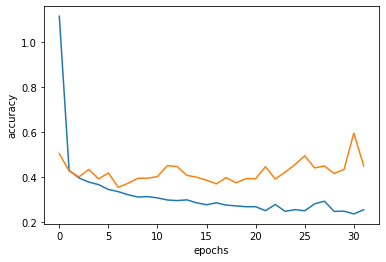

In [18]:
history = model.history.history
plt.plot(history['loss'], label='training loss')
plt.plot(history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [28]:
''' The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST. '''

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(784, activation='relu'),
                                    tf.keras.layers.Dense(375, activation='relu'),
                                    tf.keras.layers.Dense(150, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['categorical_accuracy'])

model.fit(x=xtrain, y=ytrain, epochs=16, validation_data=(xtest, ytest))

Epoch 1/16
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1543 - categorical_accuracy: 0.8010 - val_loss: 0.4741 - val_categorical_accuracy: 0.8343
Epoch 2/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4225 - categorical_accuracy: 0.8488 - val_loss: 0.4753 - val_categorical_accuracy: 0.8294
Epoch 3/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3958 - categorical_accuracy: 0.8588 - val_loss: 0.3963 - val_categorical_accuracy: 0.8573
Epoch 4/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3718 - categorical_accuracy: 0.8674 - val_loss: 0.4037 - val_categorical_accuracy: 0.8607
Epoch 5/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3555 - categorical_accuracy: 0.8720 - val_loss: 0.3740 - val_categorical_accuracy: 0.8739
Epoch 6/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3374 - categorical_accuracy: 0.8797 - val_loss: 0.4087 - val_categorical_accuracy:

Text(0, 0.5, 'accuracy')

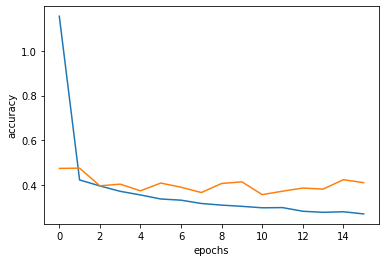

In [29]:
history = model.history.history
plt.plot(history['loss'], label='training loss')
plt.plot(history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.